<a href="https://colab.research.google.com/github/stefsyrsiri/forbes2000-data-analysis/blob/main/Legal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
legal <- read.csv("data/claim_settlements_city_of_austin.csv", header = TRUE, stringsAsFactors = FALSE, )
str(legal)
attach(legal)
legal$X_id <- NULL  # Remove the X_id column

'data.frame':	159 obs. of  8 variables:
 $ X_id                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Claim.Name                          : chr  "Valdez, Michael" "Caballero, Rosita" "Castillo, Angela" "Cutean, Nicki" ...
 $ Incident.Date                       : chr  "2015-02-28T00:00:00" "2014-06-20T00:00:00" "2015-04-02T00:00:00" "2015-04-15T00:00:00" ...
 $ Department                          : chr  "Austin Fire Dept" "Austin Police Department" "Austin Police Department" "Austin Police Department" ...
 $ Location.of.Incident..if.applicable.: chr  "Bulebell and Marigold" "Webberville" "8th Street" "2nd Street & Guadalupe" ...
 $ Amount                              : num  700 7000 947 1133 13663 ...
 $ Category                            : chr  "00 Auto" "00 Auto" "00 Auto" "00 Auto" ...
 $ Disposition.Type                    : chr  "Claim Paid" "Claim Paid" "Claim Paid" "Claim Paid" ...


The following objects are masked from legal (pos = 3):

    Amount, Category, Claim.Name, Department, Disposition.Type,
    Incident.Date, Location.of.Incident..if.applicable., X_id




In [5]:
head(legal)

,X_id,Claim.Name,Incident.Date,Department,Location.of.Incident..if.applicable.,Amount,Category,Disposition.Type
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,1,"Valdez, Michael",2015-02-28T00:00:00,Austin Fire Dept,Bulebell and Marigold,700.00,00 Auto,Claim Paid
2,2,"Caballero, Rosita",2014-06-20T00:00:00,Austin Police Department,Webberville,7000.00,00 Auto,Claim Paid
3,3,"Castillo, Angela",2015-04-02T00:00:00,Austin Police Department,8th Street,947.17,00 Auto,Claim Paid
4,4,"Cutean, Nicki",2015-04-15T00:00:00,Austin Police Department,2nd Street & Guadalupe,1133.42,00 Auto,Claim Paid
5,5,Ferrovial/ Toyota Lease Trust,2015-04-08T00:00:00,Austin Police Department,400 N. I35 service road,13663.31,00 Auto,Claim Paid
6,6,"Hardwick, Andrew",2014-12-05T00:00:00,Austin Police Department,IH35 & Riverside,565.88,00 Auto,Claim Paid


In [10]:
Incident.Date <- as.POSIXlt(Incident.Date, tz = "GMT","%m/%d/%Y %I:%M:%S %p")
head(Incident.Date,10); class(Incident.Date)

 [1] NA NA NA NA NA NA NA NA NA NA

[1] "POSIXlt" "POSIXt"

In [11]:
range(Incident.Date)

days <- as.numeric(max(Incident.Date) - min(Incident.Date))
months <- round(days/30)
hours <- days*24
cat("The total time period of recorded incidents is",
    months, "months or", days, "days or", hours, "hours.")

[1] NA NA

The total time period of recorded incidents is NA months or NA days or NA hours.

In [12]:
median(Incident.Date)

[1] NA

In [13]:
Incident.Date[round(length(Incident.Date)/2)]

[1] NA

In [14]:
which.max(table(factor(Incident.Date)))
table(factor(Incident.Date))["2014-08-28"]

integer(0)

[1] NA

In [15]:
ampm <- factor(ifelse(Incident.Date$hour < 12, "AM","PM"))
ampm

[1] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [16] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [31] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [46] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [61] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [76] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [91] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[106] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[121] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[136] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
[151] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
Levels:

In [16]:
levels(ampm)[2] <- "PM"
levels(ampm)
which.max(table(ampm))
which.max(table(Department, ampm))
rownames(table(Department, ampm))[3]
addmargins(table(Department, ampm))
round(addmargins(prop.table(table(Department, ampm)))*100,1)

[1] "PM"

PM 
 1

[1] 1

[1] "Austin Police Department"

,PM,Sum
(WPD) Watershed Protection and Development Review,0,0
Austin Fire Dept,0,0
Austin Police Department,0,0
Austin Resource Recovery,0,0
Austin Water,0,0
Aviation,0,0
Code Compliance Department,0,0
EMS,0,0
FSD - Building Services,0,0
Health and Human Services,0,0


,PM,Sum
(WPD) Watershed Protection and Development Review,NaN,NaN
Austin Fire Dept,NaN,NaN
Austin Police Department,NaN,NaN
Austin Resource Recovery,NaN,NaN
Austin Water,NaN,NaN
Aviation,NaN,NaN
Code Compliance Department,NaN,NaN
EMS,NaN,NaN
FSD - Building Services,NaN,NaN
Health and Human Services,NaN,NaN


[1] 15

Department
                            WPD      Code Compliance Department 
                              1                               1 
        FSD - Building Services                         Library 
                              1                               1 
                 Transportation                        Aviation 
                              2                               3 
Planning and Development Review       Health and Human Services 
                              3                               5 
               Austin Fire Dept                             EMS 
                              7                              10 
                   Public Works            Parks and Recreation 
                             16                              22 
       Austin Resource Recovery                    Austin Water 
                             23                              24 
       Austin Police Department                             Sum 
              

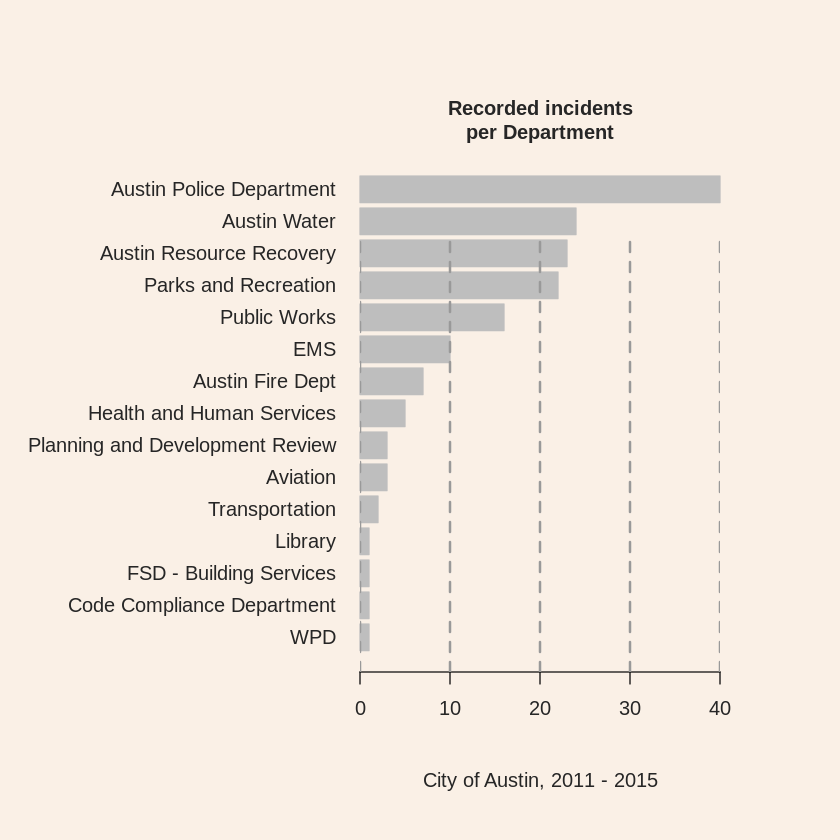

In [19]:
Department <- factor(Department)
levels(Department)[1] <- "WPD"
table <- sort((table(Department, useNA = "ifany")))
names(dimnames(table)) <- "Department"

length(table)
addmargins(table)

par(mar = c(7,15,10,5), bg="linen")
barplot(table,
    #orientation
        horiz = TRUE,
        las = 1,
        xlim = c(0, max(table(Department))),
        ylim = range(pretty(c(0, Department))),
    #text
        main = "Recorded incidents\nper Department",
        sub = "City of Austin, 2011 - 2015",
    #size
        cex.main = 1,
    #colors
        col.axis = "gray15",
        col.main = "gray15",
        col.sub = "gray15",
        col = "gray",
        border = "gray"
        )

grid(nx = NULL, ny = NA, lwd = 2, lty = 2, col = "gray60")

In [20]:
Amount <- as.numeric(substring(Amount, 2, nchar(Amount)))
head(Amount); class(Amount)
summary(Amount)

#NA treatment
Amount[is.na(Amount)] <- median(Amount, na.rm = TRUE)

#outlier treatment
Q3 <- unname(quantile(Amount)[4])
outliers <- which(Amount > Q3 + 1.5 * IQR(Amount))
for(i in 1:length(Amount[outliers])){
  Amount[outliers][i] <- median(Amount)
}

which.max(tapply(Amount, Category, sum))
tapply(Amount, Category, sum)["00 Auto"]

[1]    0.00    0.00   47.17  133.42 3663.31   65.88

[1] "numeric"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    0.00    45.72    92.53   761.28   596.84 55000.00        1 

00 Auto 
      1

00 Auto 
40631.86

In [21]:
which.max(tapply(Amount, Category, mean))

00 Auto 
      1

In [22]:
head(Claim.Name,35)
list1 <- regmatches(Claim.Name, regexpr("(?<=,) +(?!Inc)[a-zA-Z]{2,30}", Claim.Name, perl = TRUE))
list1

list1 <- regmatches(list1, regexpr("[a-zA-Z]{2,30}", list1, perl = TRUE))
list1

list2 <- regmatches(Claim.Name, regexpr("(?<=and )[a-zA-Z]{2,30}", Claim.Name, perl = TRUE))
list2

firstnames <- factor(c(list1, list2))

nlevels(firstnames)
which.max(table(firstnames))
table(firstnames)["Jennifer"]
Claim.Name[grep("Jennifer", Claim.Name)]

detach(legal)

[1] "Valdez, Michael"                               
 [2] "Caballero, Rosita"                             
 [3] "Castillo, Angela"                              
 [4] "Cutean, Nicki"                                 
 [5] "Ferrovial/ Toyota Lease Trust"                 
 [6] "Hardwick, Andrew"                              
 [7] "Hardy, Ryan"                                   
 [8] "Henna Chevrolet"                               
 [9] "Hertz (Hardy)"                                 
[10] "Kempter, Anne"                                 
[11] "Kenyon, Rachel"                                
[12] "Lopez de Araya Bengoa, Imanol (MINOR INVOLVED)"
[13] "Scott, Nadia"                                  
[14] "Aleman, Nelda"                                 
[15] "Blair, Jackie"                                 
[16] "Grays, Jessica"                                
[17] "Katz, Lauren"                                  
[18] "Rayburn, Charles"                              
[19] "USAA (Butler, Bill)"                           
[20] "Allstate (Pitts)"                              
[21] "AT&T (150280)"                                 
[22] "AT&T (150480)"                                 
[23] "Dawson, Jennifer"                              
[24] "Reed Hawkins, Tam"                             
[25] "Rodriguez, Gina"                               
[26] "Saucedo, Blondena"                             
[27] "Texas Gas (150257)"                            
[28] "Seton (Brackenridge)"                          
[29] "Stringer, John"                                
[30] "Guo, Sue"                                      
[31] "Washington, Cynthia"                           
[32] "Garcia, Miranda"                               
[33] "Goodall, Jannette"                             
[34] "Herbert, Robert"                               
[35] "Martinez, Rudy"

[1] " Michael"   " Rosita"    " Angela"    " Nicki"     " Andrew"   
  [6] " Ryan"      " Anne"      " Rachel"    " Imanol"    " Nadia"    
 [11] " Nelda"     " Jackie"    " Jessica"   " Lauren"    " Charles"  
 [16] " Bill"      " Jennifer"  " Tam"       " Gina"      " Blondena" 
 [21] " John"      " Sue"       " Cynthia"   " Miranda"   " Jannette" 
 [26] " Robert"    " Rudy"      " Rebecca"   " Raymond"   " Laurel"   
 [31] " Bob"       " Dorcas"    " Christie"  " Daniel"    " Max"      
 [36] " Sapna"     " Cassandra" " Debra"     " Brian"     " Jennifer" 
 [41] " Aditya"    " Catina"    " Laura"     " Danielle"  " Katrina"  
 [46] " Dylan"     " Mauricio"  " James"     " Nick"      " Mike"     
 [51] " Paul"      " Jennifer"  " Raymond"   " Maureen"   " Jon"      
 [56] " Gilbert"   " Lisa"      " Kristy"    " Juan"      " Eduardo"  
 [61] " Anna"      " Ana"       " Maria"     " Stephanie" " Craig"    
 [66] " Nicole"    " Matthew"   " Orlando"   " Ellen"     " William"  
 [71] " Robert"    " Dennis"    " Marley"    " Ronnie"    " Marissa"  
 [76] " Jessica"   " Delia"     " Bonnie"    " Andre"     " Brien"    
 [81] " Paula"     " Alfredo"   " Sheri"     " Jesse"     " Debra"    
 [86] " Nicole"    " Husain"    " Jose"      " Mary"      " William"  
 [91] " Carolina"  " Esmeralda" " Abner"     " Gilbert"   " Jyl"      
 [96] " Stacey"    " Nancy"     " Maricela"  " Alan"      " Luis"     
[101] " Bianca"    " Laura"     " Odalys"    " Patrick"   " Fernando" 
[106] " Dolores"   " Jonathan"  "  Sean"     " Matthew"   " Phillip"  
[111] " Diana"     " Pauline"   " Mike"      " Josefina"  " Eric"     
[116] " Maria"     " Jacob"     " Tim"       " Lorre"     " Frank"    
[121] " Patricia"  " Tim"       " Sean"

[1] "Michael"   "Rosita"    "Angela"    "Nicki"     "Andrew"    "Ryan"     
  [7] "Anne"      "Rachel"    "Imanol"    "Nadia"     "Nelda"     "Jackie"   
 [13] "Jessica"   "Lauren"    "Charles"   "Bill"      "Jennifer"  "Tam"      
 [19] "Gina"      "Blondena"  "John"      "Sue"       "Cynthia"   "Miranda"  
 [25] "Jannette"  "Robert"    "Rudy"      "Rebecca"   "Raymond"   "Laurel"   
 [31] "Bob"       "Dorcas"    "Christie"  "Daniel"    "Max"       "Sapna"    
 [37] "Cassandra" "Debra"     "Brian"     "Jennifer"  "Aditya"    "Catina"   
 [43] "Laura"     "Danielle"  "Katrina"   "Dylan"     "Mauricio"  "James"    
 [49] "Nick"      "Mike"      "Paul"      "Jennifer"  "Raymond"   "Maureen"  
 [55] "Jon"       "Gilbert"   "Lisa"      "Kristy"    "Juan"      "Eduardo"  
 [61] "Anna"      "Ana"       "Maria"     "Stephanie" "Craig"     "Nicole"   
 [67] "Matthew"   "Orlando"   "Ellen"     "William"   "Robert"    "Dennis"   
 [73] "Marley"    "Ronnie"    "Marissa"   "Jessica"   "Delia"     "Bonnie"   
 [79] "Andre"     "Brien"     "Paula"     "Alfredo"   "Sheri"     "Jesse"    
 [85] "Debra"     "Nicole"    "Husain"    "Jose"      "Mary"      "William"  
 [91] "Carolina"  "Esmeralda" "Abner"     "Gilbert"   "Jyl"       "Stacey"   
 [97] "Nancy"     "Maricela"  "Alan"      "Luis"      "Bianca"    "Laura"    
[103] "Odalys"    "Patrick"   "Fernando"  "Dolores"   "Jonathan"  "Sean"     
[109] "Matthew"   "Phillip"   "Diana"     "Pauline"   "Mike"      "Josefina" 
[115] "Eric"      "Maria"     "Jacob"     "Tim"       "Lorre"     "Frank"    
[121] "Patricia"  "Tim"       "Sean"

[1] "Marilu"   "Maximino"

[1] 110

Jennifer 
      48

Jennifer 
       3

[1] "Dawson, Jennifer"   "Burrough, Jennifer" "Liu, Jennifer"